In [60]:
import pandas as pd
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
from matplotlib import figure

plt.style.use('ggplot')
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (16, 8)

#col_pal = sns.color_palette()

In [61]:
#data frame and qucik look at data
df = pd.read_csv('movies.csv')
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [62]:
df.size #display dataset size

115020

### Preprocessing
The following code down below showcases data cleaning

In [63]:

#droping nulls
for i, row in df.iterrows():
    nulls = row.isnull().sum()

    if nulls > 0:
        df.drop(i, inplace=True)

df.reset_index(drop=True, inplace=True)


In [64]:
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [65]:
#sorting by gross
df.sort_values(by=['gross'], inplace=False, ascending=False)
pd.set_option('display.max_rows', None)


### Summary statistics

In [66]:
stats = df[['budget', 'gross', 'votes', 'runtime']].describe()
skew = df[['budget', 'gross', 'votes', 'runtime']].skew().tolist()

#display statistics
stats

,budget,gross,votes,runtime
count,5.421000e+03,5.421000e+03,5.421000e+03,5421.000000
mean,3.600917e+07,1.032297e+08,1.150661e+05,108.152739
std,4.157337e+07,1.873027e+08,1.844073e+05,18.115698
min,6.000000e+03,3.090000e+02,1.950000e+02,63.000000
25%,1.000000e+07,1.073640e+07,1.900000e+04,95.000000
50%,2.180000e+07,3.686941e+07,5.200000e+04,105.000000
75%,4.500000e+07,1.124625e+08,1.290000e+05,118.000000
max,3.560000e+08,2.847246e+09,2.400000e+06,271.000000


### Data correlations
**Scatter plots**
Scatter plots of budget/earnings

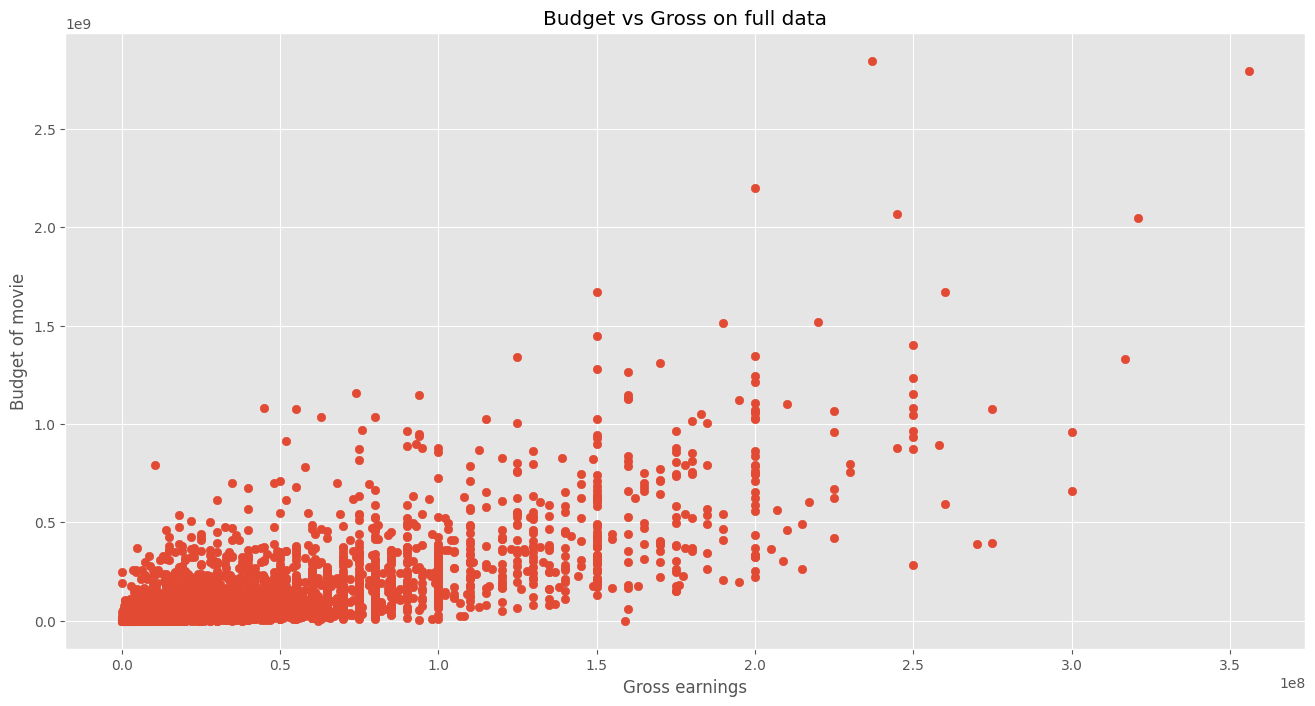

In [67]:
#scatter plot for full data
plt.title('Budget vs Gross on full data')
plt.xlabel('Gross earnings')
plt.ylabel('Budget of movie')
plt.scatter(x=df['budget'], y=df['gross'])
plt.show()

In [68]:
#getting top 500 movies based on their gross
fh_copy = df.copy()
top_fh_gr = fh_copy.nlargest(500, 'gross')
top_fh = top_fh_gr.head(500)

#displaying
top_fh.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
3731,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
5302,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
1795,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
4730,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
5158,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0


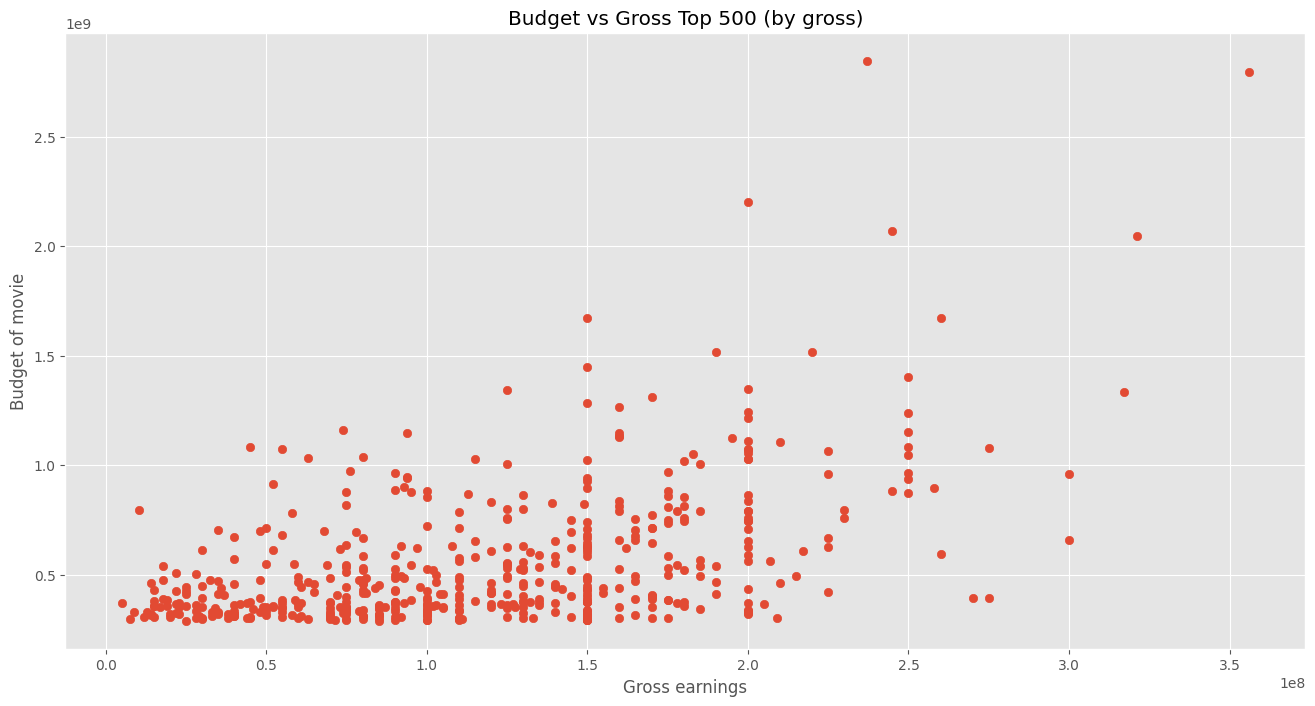

In [69]:
#scatter plot for top 500 movies based on gross

plt.title('Budget vs Gross Top 500 (by gross)')
plt.xlabel('Gross earnings')
plt.ylabel('Budget of movie')
plt.scatter(x=top_fh['budget'], y=top_fh['gross'])
plt.show()

Regression plots for movies

<Axes: xlabel='budget', ylabel='gross'>

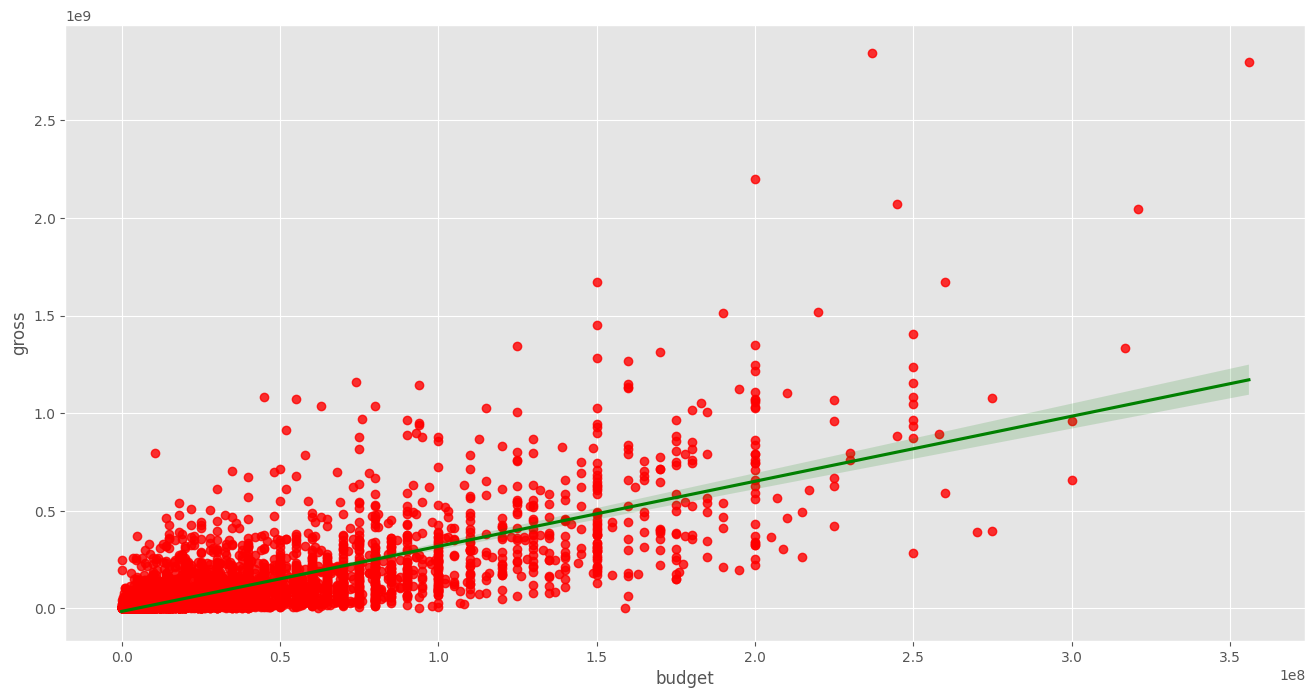

In [70]:
#regression plot with seaborn for all the movies
sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": "red"}, line_kws={"color":"green"})


<Axes: xlabel='budget', ylabel='gross'>

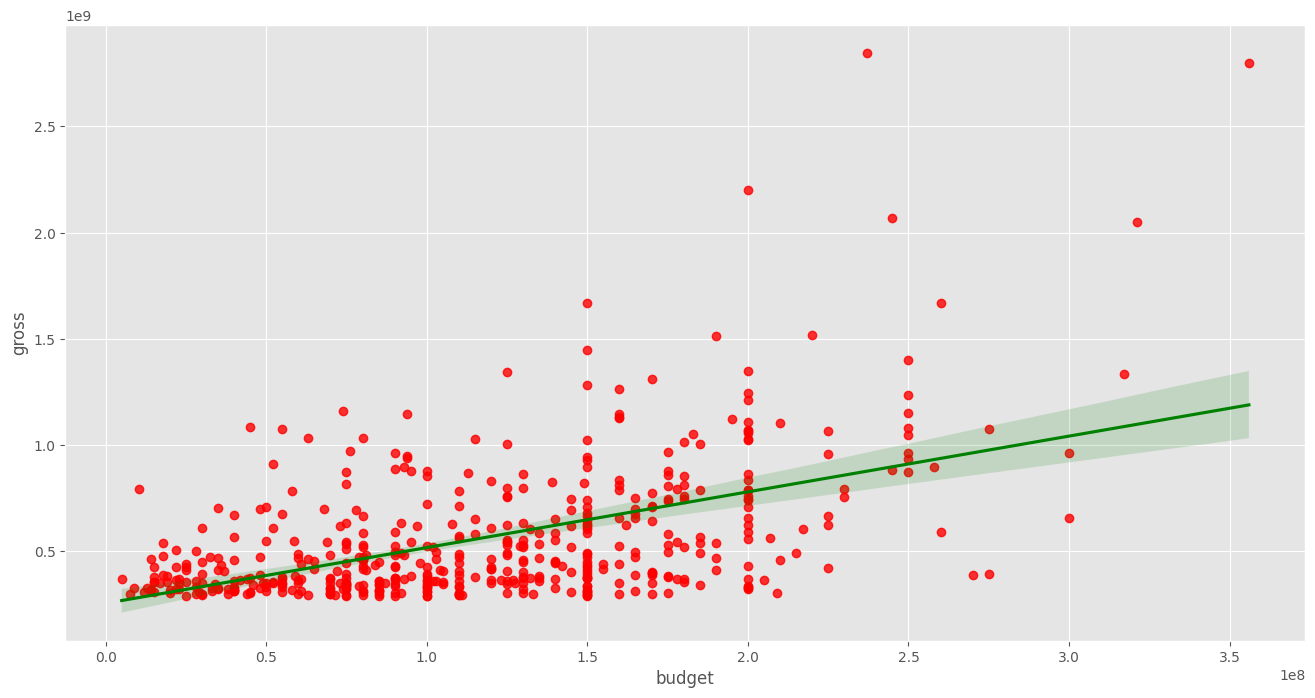

In [71]:
#regresion plot for 500 moviers with top gross
sns.regplot(x='budget', y='gross', data=top_fh, scatter_kws={"color": "red"}, line_kws={"color":"green"})

In [72]:
numerics = df.select_dtypes(include=[np.number])
numerics.corr() #base is pearson correlation method which measures the strength of the linear relationship between two variables

,year,score,votes,budget,gross,runtime
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


#### Correlation matrix
Based of correlation done with pearson method on data we can see a strong link between budget and gross which we can furher visualize by using correlation matrix

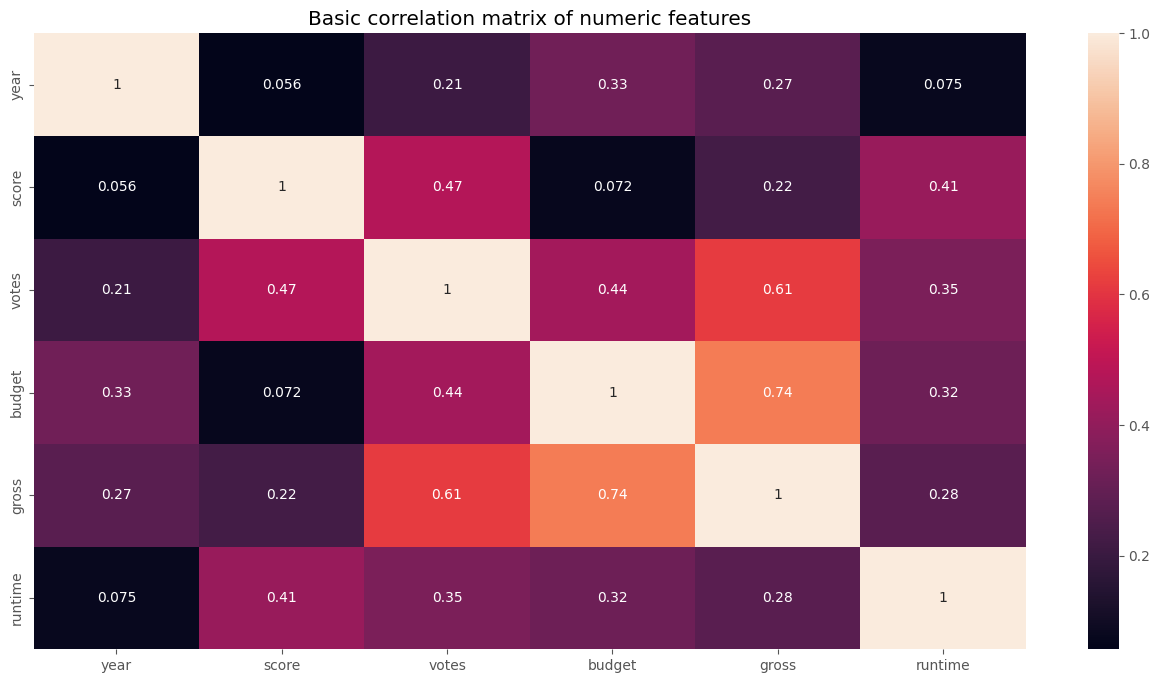

In [73]:
cor_mat = numerics.corr()
plt.title("Basic correlation matrix of numeric features")
sns.heatmap(cor_mat, annot=True)
plt.show()

In [74]:
df_numer = df.copy()

for col in df_numer.columns:
    if(df_numer[col].dtype == 'object'):
        df_numer[col] = df_numer[col].astype('category')
        df_numer[col] = df_numer[col].cat.codes

df_numer.head(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,4692,6,6,1980,1304,8.4,927000.0,1795,2832,699,46,19000000,46998772,1426,146.0
1,3929,6,1,1980,1127,5.8,65000.0,1578,1158,214,47,4500000,58853106,452,104.0
2,3641,4,0,1980,1359,8.7,1200000.0,757,1818,1157,47,18000000,538375067,945,124.0
3,204,4,4,1980,1127,7.7,221000.0,889,1413,1474,47,3500000,83453539,1108,88.0
4,732,6,4,1980,1170,7.3,108000.0,719,351,271,47,6000000,39846344,1083,98.0
5,1509,6,9,1980,1922,6.4,123000.0,1758,3081,155,47,550000,39754601,1108,95.0
6,3930,6,0,1980,1359,7.9,188000.0,974,576,860,47,27000000,115229890,1397,133.0
7,3122,6,3,1980,530,8.2,330000.0,1269,1257,1469,47,18000000,23402427,390,129.0
8,3732,4,0,1980,1346,6.8,101000.0,1606,1402,595,47,54000000,108185706,548,127.0
9,4401,6,3,1980,1755,7.0,10000.0,2011,280,402,47,10000000,15795189,1391,100.0


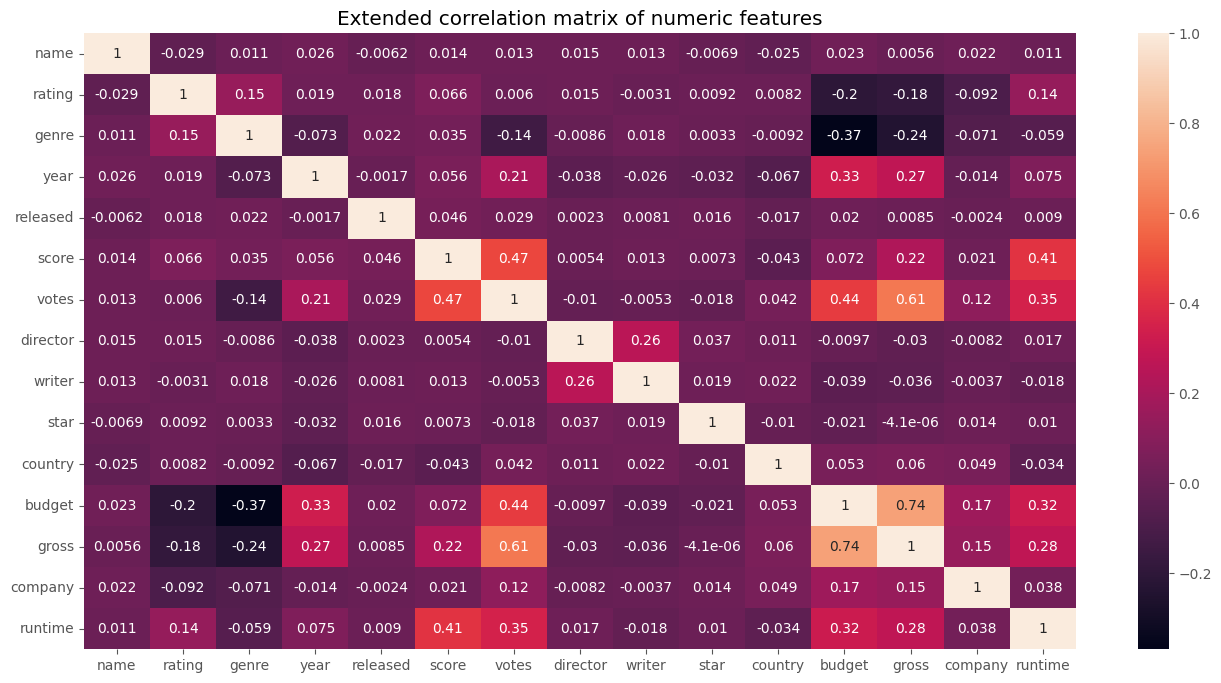

In [75]:
cor_mat = df_numer.corr()

plt.title("Extended correlation matrix of numeric features")
sns.heatmap(cor_mat, annot=True)

plt.show()

#### Visualization of correlation on extended cor. matrix
The darker the color the lesser is the correlation between the variables

In [76]:
#unstacking and pairing
pairs = cor_mat.unstack()
pairs_srtd = pairs.sort_values()

#displaying high correlation pairs
hi_pairs = pairs_srtd[(pairs_srtd)>0.6]

hi_pairs

votes     gross       0.614751
gross     votes       0.614751
          budget      0.740247
budget    gross       0.740247
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

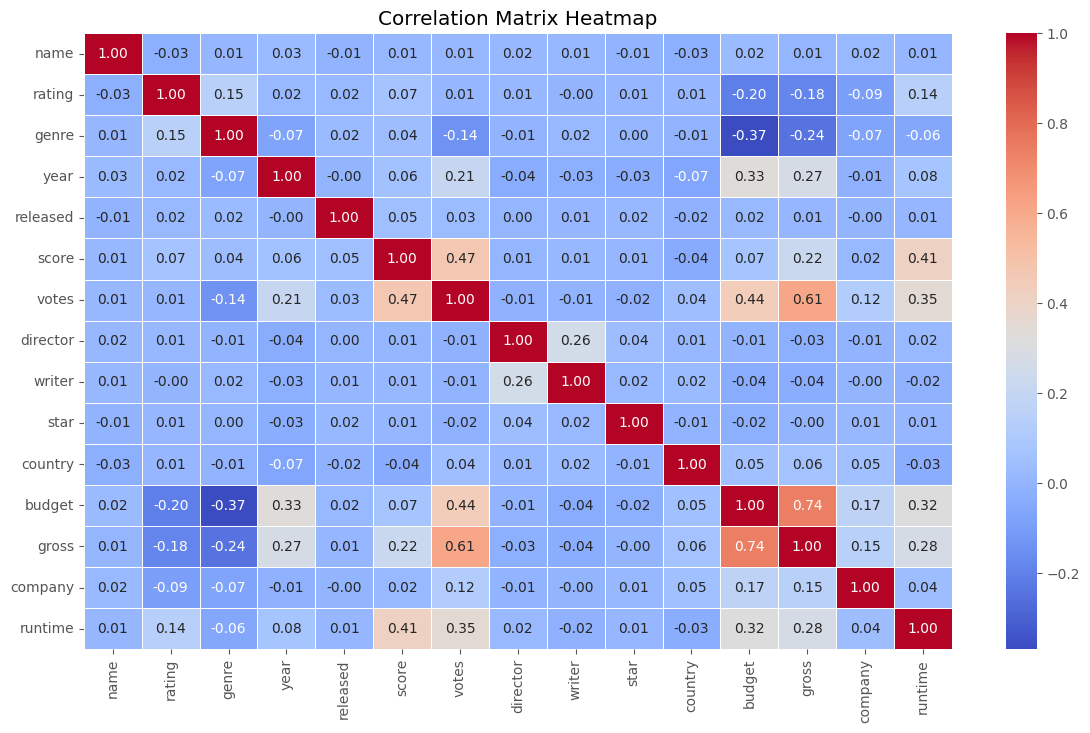

In [81]:
sns.heatmap(cor_mat, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation matrix heatmap')
plt.show()

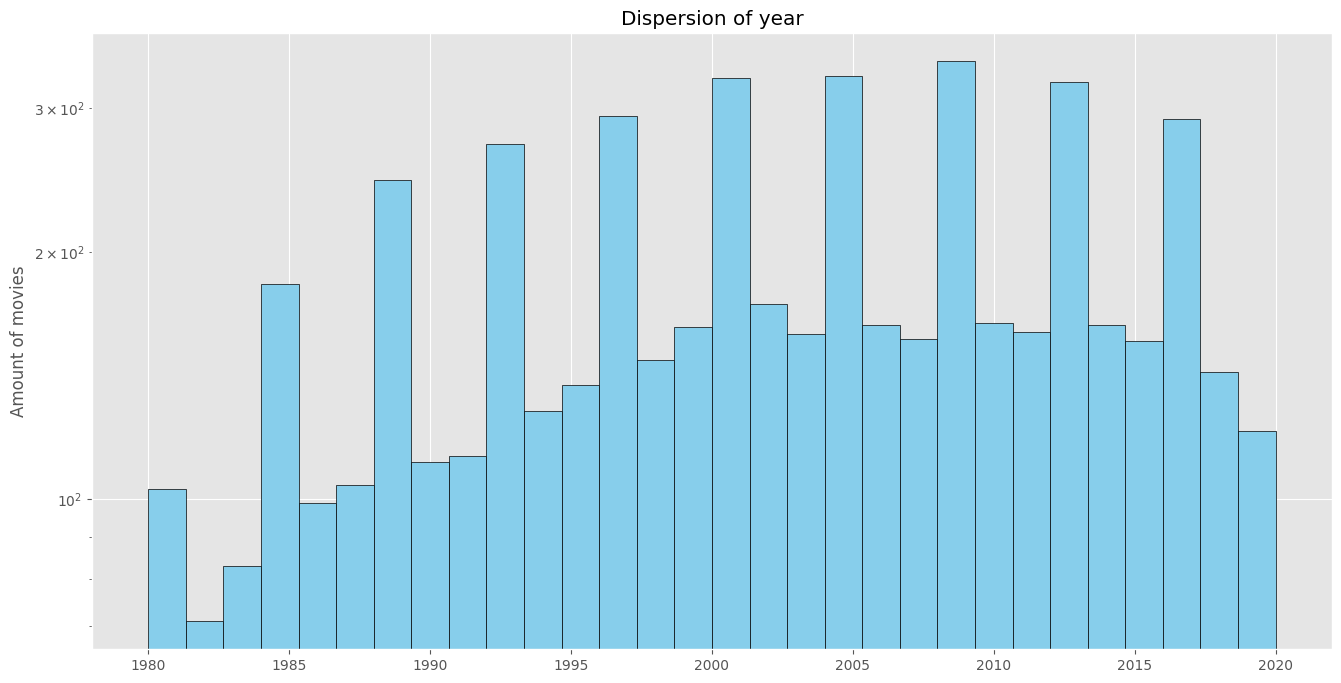

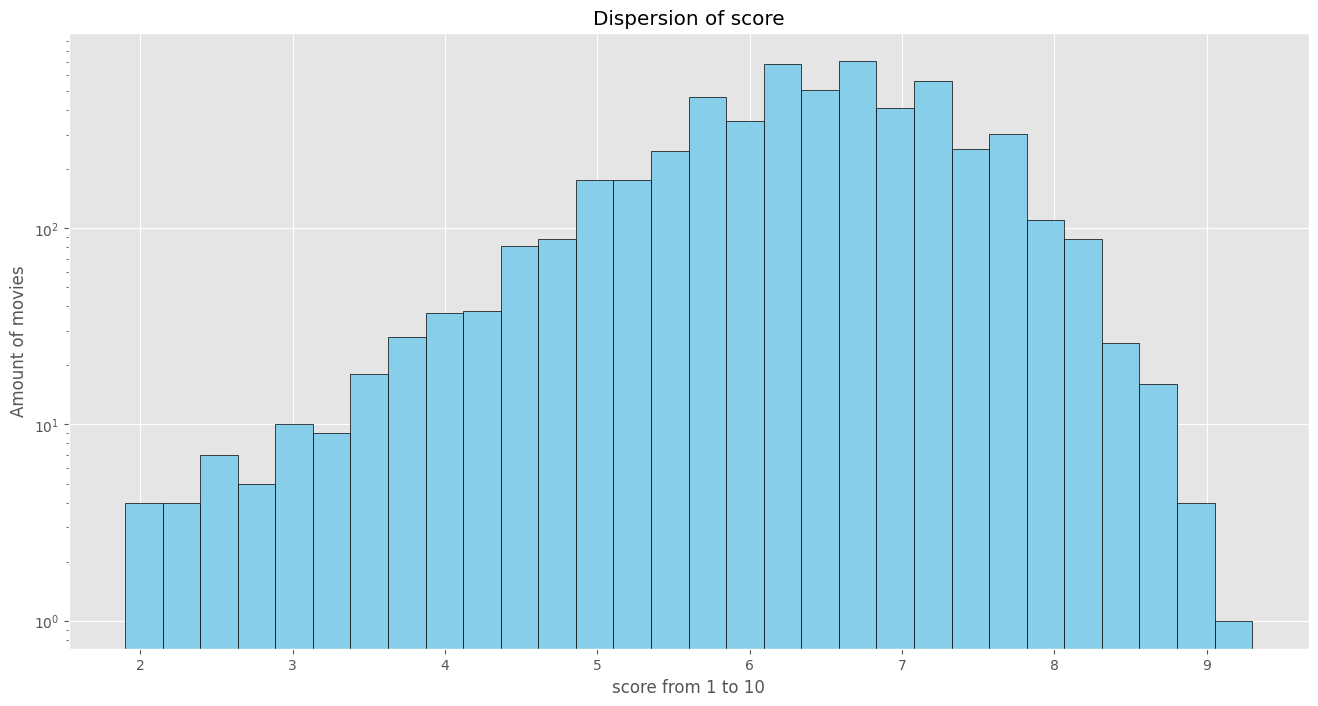

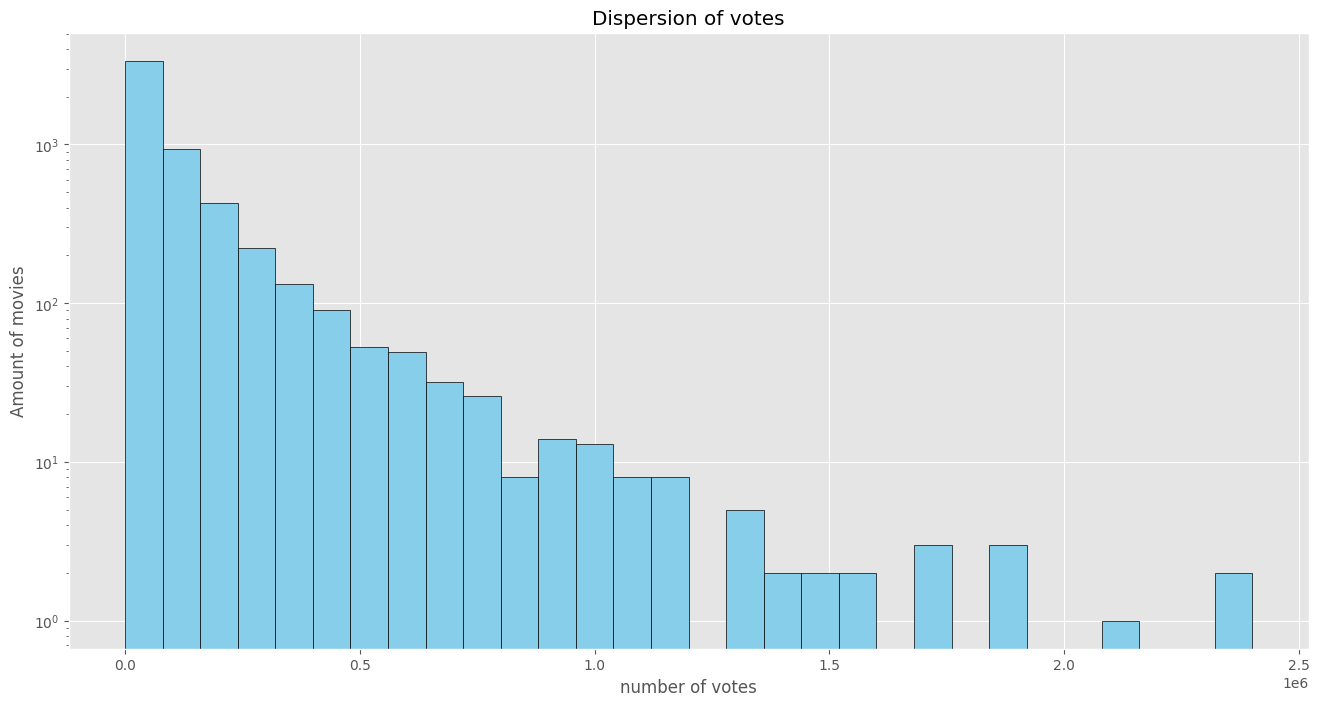

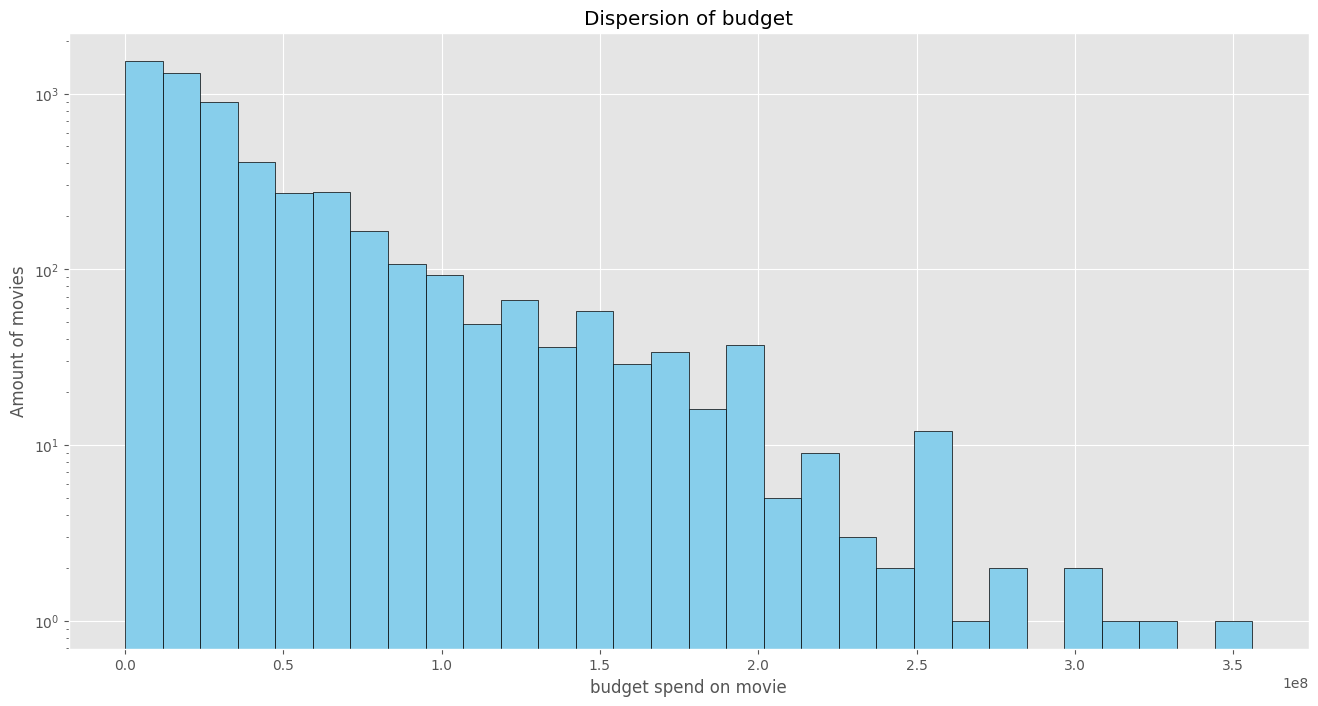

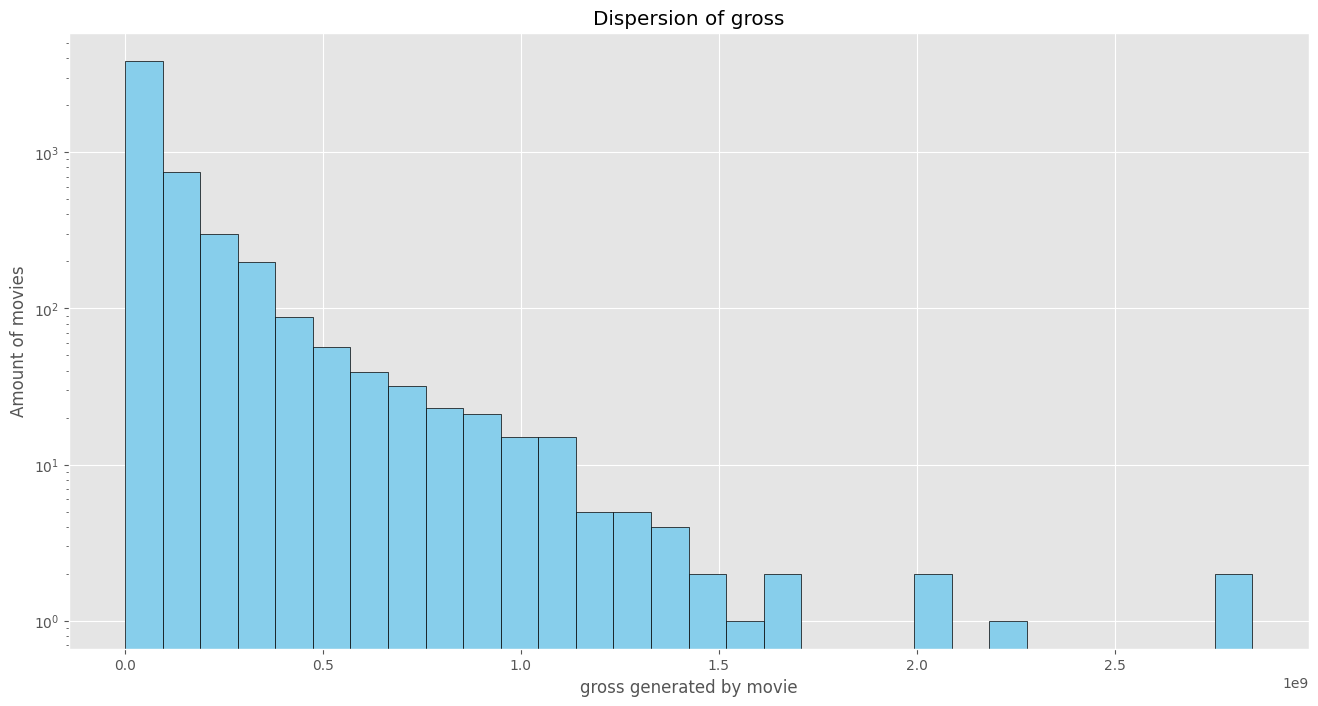

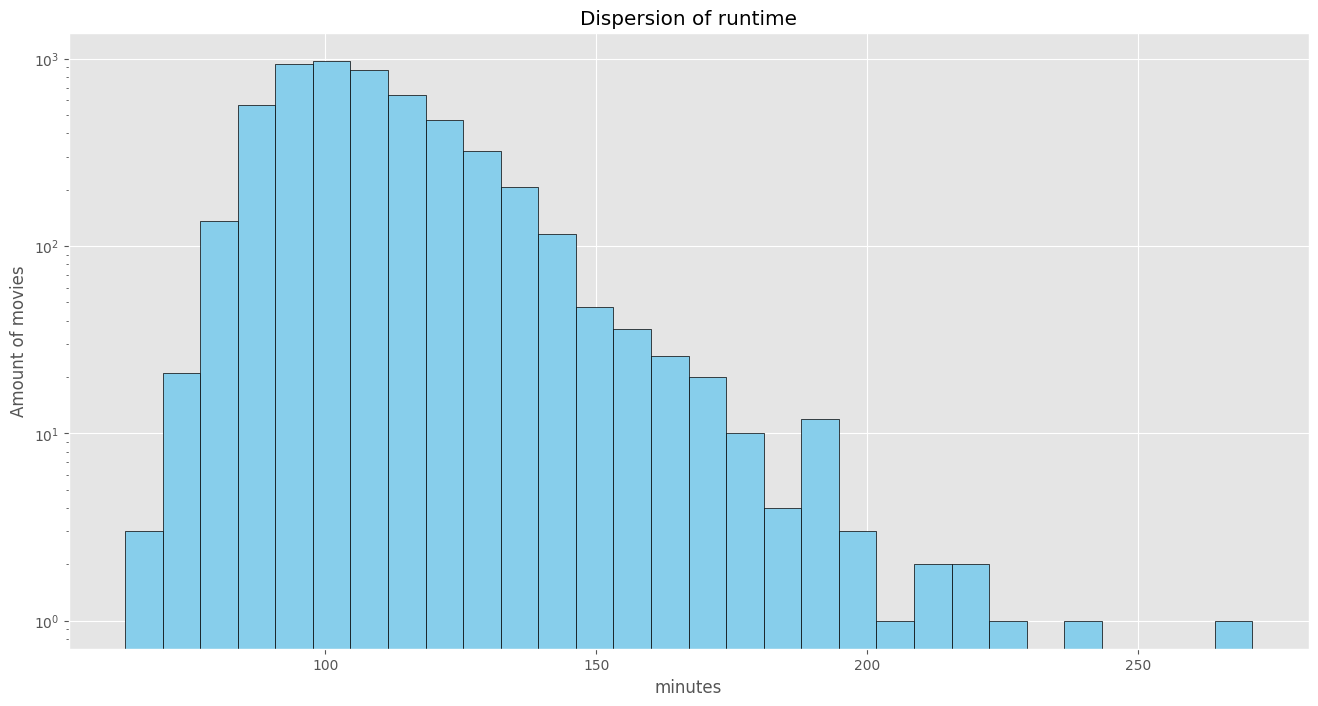

In [82]:
#plots for numeric data

numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

for i in range(len(numeric_columns)):
    col = numeric_columns[i]
    plt.hist(df[col], bins=30,color = 'skyblue', edgecolor = 'black')
    plt.title(f'Dispersion of {col}')
    plt.ylabel('Amount of movies')
    if str(col) == 'score':
        plt.xlabel('score from 1 to 10')

    if str(col) == 'votes':
        plt.xlabel('number of votes')

    if str(col) == 'budget':
        plt.xlabel('budget spend on movie') #related to amount of movies with this budget
    
    if str(col) == 'gross':
        plt.xlabel('gross generated by movie') 
        

    if str(col) == 'runtime':
        plt.xlabel('minutes') 

    plt.yscale('log')
    plt.grid(True)
    plt.show()

#### Genre Analysis

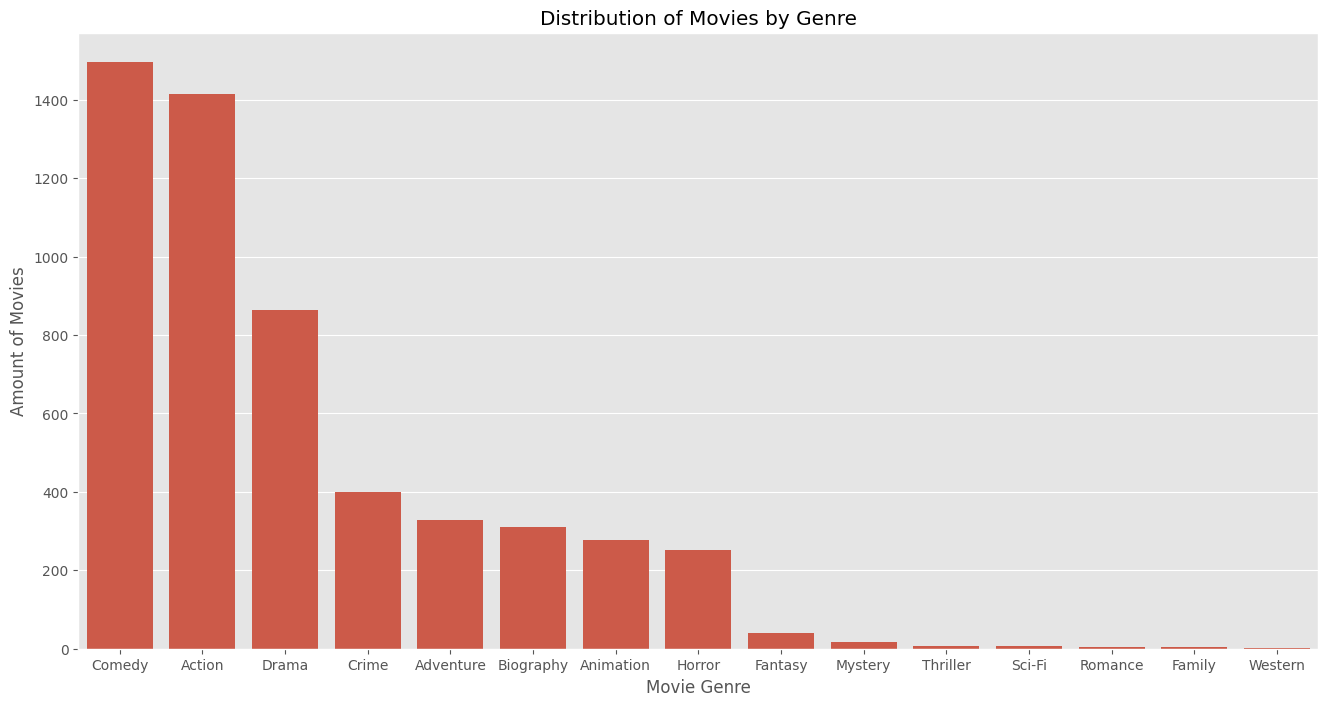

,genre,rating,budget,gross
0,Action,5.369611,5.846856e+07,1.680232e+08
1,Adventure,4.535168,4.595890e+07,1.332682e+08
2,Animation,3.198556,7.632336e+07,2.811044e+08
3,Biography,5.324759,2.544167e+07,6.139527e+07
4,Comedy,5.219920,2.280237e+07,5.916766e+07
5,Crime,5.839599,2.260290e+07,5.016958e+07
6,Drama,5.378911,2.324188e+07,6.036914e+07
7,Family,3.250000,5.112500e+07,5.185831e+08
8,Fantasy,5.512195,1.722439e+07,3.987870e+07
9,Horror,5.737052,1.343453e+07,5.681695e+07


In [83]:
sns.countplot(data=df, x='genre', order=df['genre'].value_counts().index,)
plt.title('Distribution of Movies by Genre')
plt.ylabel('Amount of Movies')
plt.xlabel('Movie Genre')
plt.show()


genre_stats = df_numer.groupby(df['genre']).agg({'rating': 'mean', 'budget': 'mean', 'gross': 'mean'}).reset_index()
genre_stats


#### Actors and Directors analysis
Displaying top movie stars and directors

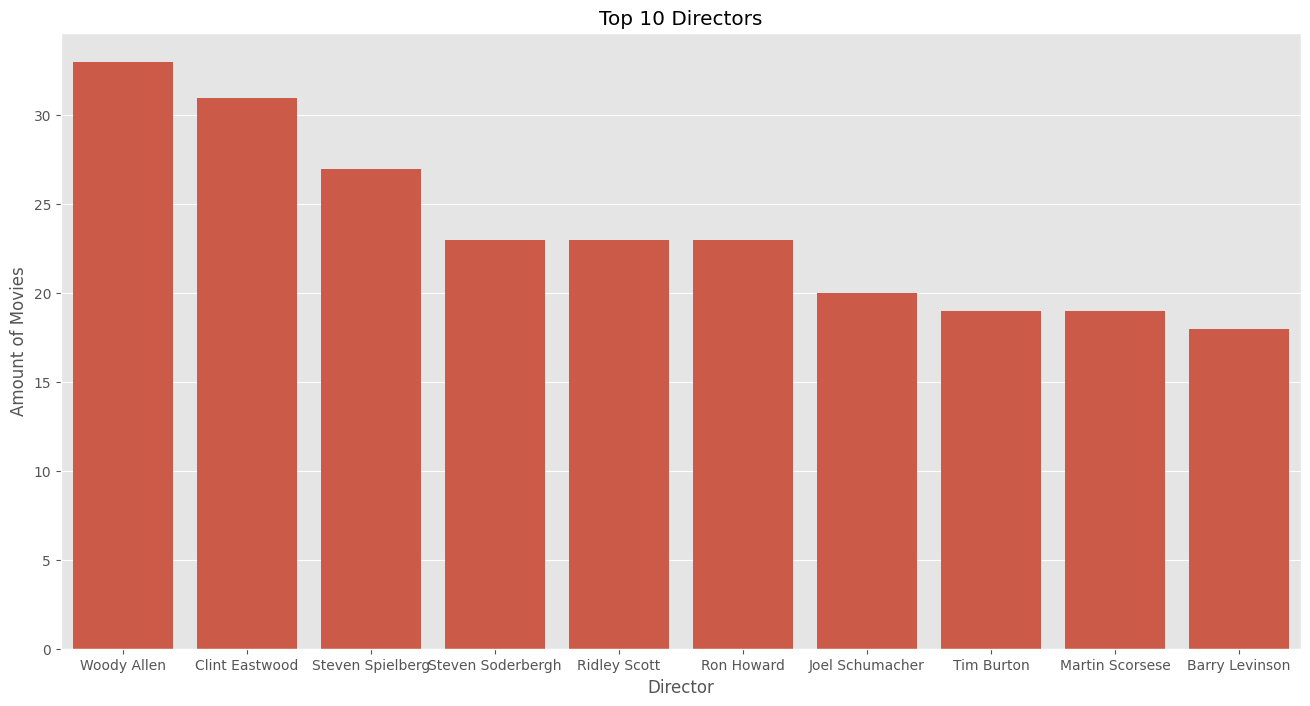

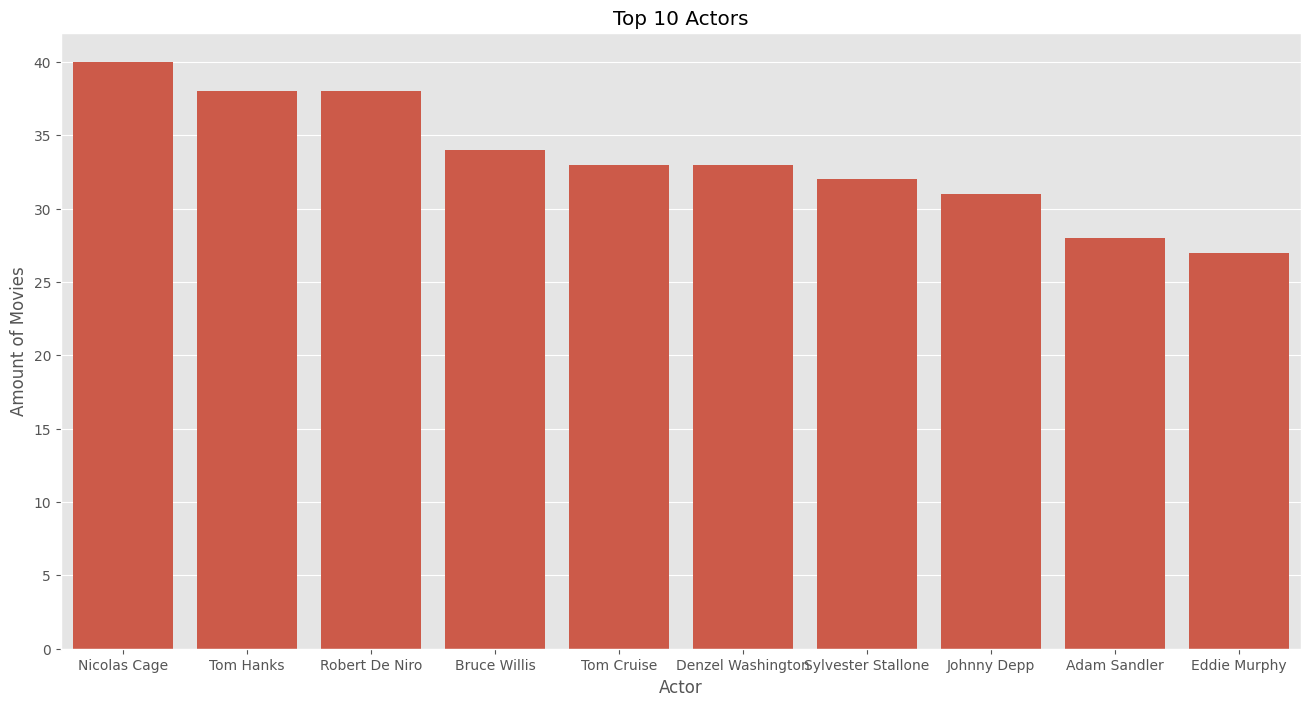

In [84]:
top_dirs = df['director'].value_counts().head(10)
top_act = df['star'].value_counts().head(10)


sns.barplot(x=top_dirs.index, y=top_dirs.values)
plt.title('Top 10 Directors')
plt.ylabel('Amount of Movies')
plt.xlabel('Director')

plt.show()


sns.barplot(x=top_act.index, y=top_act.values)
plt.title('Top 10 Actors')
plt.ylabel('Amount of Movies')
plt.xlabel('Actor')
plt.show()
